In [132]:
import numpy as np
import pandas as pd
from collections import Counter
from numpy import random
import os
import scipy
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm, t
import seaborn as sns
import pylab
from pylab import legend, plot, show, title, xlabel, ylabel


In [2]:
previousApplication=pd.read_csv('previous_application.csv')

In [3]:
previousApplication.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
previousApplication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [5]:
previousApplication.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [6]:
(previousApplication.isnull().sum()/len(previousApplication.index))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

# Data Cleaning:
# Deleting columns with missing values > 40%

In [7]:
previousApplication = previousApplication.drop(["AMT_DOWN_PAYMENT", "RATE_INTEREST_PRIMARY",
                                                "RATE_DOWN_PAYMENT", "RATE_INTEREST_PRIVILEGED"], axis=1)

In [8]:
(previousApplication.isnull().sum()/len(previousApplication.index))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

# TREATING MISSING VALUES (columun wise)

# AMT_ANNUITY

In [9]:
previousApplication["AMT_ANNUITY"].isnull().sum()

372235

In [10]:
previousApplication["AMT_ANNUITY"].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [11]:
median_value=previousApplication['AMT_ANNUITY'].median()
median_value

11250.0

In [12]:
previousApplication['AMT_ANNUITY'].fillna(median_value, inplace=True)

C:\Users\amitk\AppData\Local\Temp\ipykernel_12012\265806764.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  previousApplication['AMT_ANNUITY'].fillna(median_value, inplace=True)


In [13]:
previousApplication["AMT_ANNUITY"].isnull().sum()

0

# AMT_GOODS_PRICE 

In [14]:
previousApplication["AMT_GOODS_PRICE"].isnull().sum()

385515

In [15]:
previousApplication["AMT_GOODS_PRICE"].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [16]:
median_value=previousApplication['AMT_GOODS_PRICE'].median()
median_value

112320.0

In [17]:
previousApplication['AMT_GOODS_PRICE'].fillna(median_value, inplace=True)

C:\Users\amitk\AppData\Local\Temp\ipykernel_12012\687804493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  previousApplication['AMT_GOODS_PRICE'].fillna(median_value, inplace=True)


In [18]:
previousApplication["AMT_GOODS_PRICE"].isnull().sum()

0

# CNT_PAYMENT

In [19]:
previousApplication["CNT_PAYMENT"].isnull().sum()

372230

In [20]:
previousApplication["CNT_PAYMENT"].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [21]:
median_value=previousApplication['CNT_PAYMENT'].median()
median_value

12.0

In [22]:
previousApplication['CNT_PAYMENT'].fillna(median_value, inplace=True)

C:\Users\amitk\AppData\Local\Temp\ipykernel_12012\1155171616.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  previousApplication['CNT_PAYMENT'].fillna(median_value, inplace=True)


In [23]:
previousApplication['CNT_PAYMENT'].isnull().sum()

0

In [24]:
(previousApplication.isnull().sum()/len(previousApplication.index))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

In [25]:
previousApplication['PRODUCT_COMBINATION']

0             POS mobile with interest
1                     Cash X-Sell: low
2                    Cash X-Sell: high
3                  Cash X-Sell: middle
4                    Cash Street: high
                      ...             
1670209     POS industry with interest
1670210     POS industry with interest
1670211    POS household with interest
1670212               Cash X-Sell: low
1670213            Cash X-Sell: middle
Name: PRODUCT_COMBINATION, Length: 1670214, dtype: object

In [26]:
mode_value = previousApplication['PRODUCT_COMBINATION'].mode()[0]
mode_value

'Cash'

In [27]:
previousApplication['PRODUCT_COMBINATION'].fillna(mode_value, inplace=True)

In [28]:
previousApplication['CNT_PAYMENT'].isnull().sum()

0

In [29]:
(previousApplication.isnull().sum()/len(previousApplication.index))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

In [30]:
previousApplication['NAME_TYPE_SUITE']

0                      NaN
1            Unaccompanied
2          Spouse, partner
3                      NaN
4                      NaN
                ...       
1670209                NaN
1670210      Unaccompanied
1670211    Spouse, partner
1670212             Family
1670213             Family
Name: NAME_TYPE_SUITE, Length: 1670214, dtype: object

In [31]:
previousApplication['NAME_TYPE_SUITE'].isnull().sum()

820405

In [32]:
mode_value = previousApplication['NAME_TYPE_SUITE'].mode()[0]
mode_value

'Unaccompanied'

In [33]:
previousApplication['NAME_TYPE_SUITE'].fillna(mode_value, inplace=True)

In [34]:
previousApplication.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         0
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                     0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                     0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                         0
NAME_YIELD_GROUP                    0
PRODUCT_COMB

In [35]:
previousApplication = previousApplication.drop(['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE',   
'DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'], axis=1)

In [36]:
previousApplication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1670214 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

# application data set 

In [37]:
applications=pd.read_csv('application_data.csv')

In [38]:
applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [39]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
(applications.isnull().sum()/len(applications.index))*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [40]:
columnsToDelete = ["OWN_CAR_AGE", "EXT_SOURCE_1", "APARTMENTS_AVG", 
                   "BASEMENTAREA_AVG", "YEARS_BUILD_AVG", "COMMONAREA_AVG",
                   "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG",
                   "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG",
                   "NONLIVINGAREA_AVG", "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BUILD_MODE",
                   "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE", "FLOORSMIN_MODE", "LANDAREA_MODE", 
                   "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE",
                   "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI",
                   "ENTRANCES_MEDI", "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI",
                   "NONLIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", 
                   "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE"]

In [41]:
columnsToDelete1 = ['YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE',    
'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE']

In [42]:
applications.drop(columnsToDelete, axis = 1, inplace = True)

In [43]:
applications.drop(columnsToDelete1, axis = 1, inplace = True)

In [44]:
applications.shape

(307511, 73)

In [45]:
(applications.isnull().sum()/len(applications.index))*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [46]:
applications.drop([ "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", 
"FLAG_PHONE", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "FLAG_EMAIL", "REGION_RATING_CLIENT",
 "REGION_RATING_CLIENT_W_CITY", "DAYS_LAST_PHONE_CHANGE","FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", 
"FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", 
"FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16",
 "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "EXT_SOURCE_2",
 "EXT_SOURCE_3"], axis=1, inplace = True)

In [47]:
applications.shape

(307511, 42)

In [48]:
(applications.isnull().sum()/len(applications.index))*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCES

In [49]:
applications.drop(['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK',
                  'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR'], axis=1, inplace = True)

In [50]:
applications.drop(['OCCUPATION_TYPE'], axis=1, inplace = True)

In [51]:
(applications.isnull().sum()/len(applications.index))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
CNT_FAM_MEMBERS                0.000650
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000


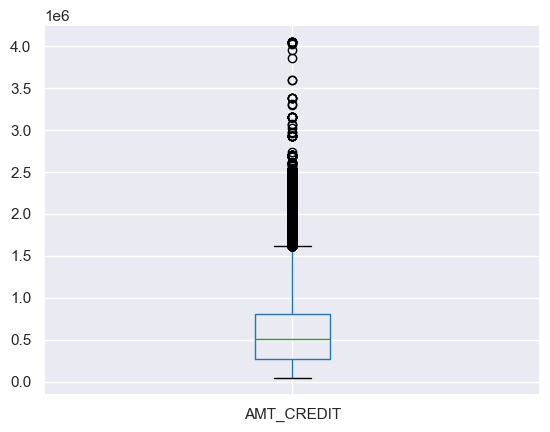

In [130]:
applications.boxplot("AMT_CREDIT")
plt.show()

# Checking data with more than 30% null values

In [52]:
applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [53]:
median_value1=applications['OBS_30_CNT_SOCIAL_CIRCLE'].median()
median_value1

0.0

In [54]:
median_value2=applications['DEF_30_CNT_SOCIAL_CIRCLE'].median()
median_value2

0.0

In [55]:
median_value3=applications['OBS_60_CNT_SOCIAL_CIRCLE'].median()
median_value3

0.0

In [56]:
median_value4=applications['DEF_60_CNT_SOCIAL_CIRCLE'].median()
median_value4

0.0

# getting all medain value in zeros 

In [57]:
applications['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(median_value1, inplace=True)

C:\Users\amitk\AppData\Local\Temp\ipykernel_12012\1677907437.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  applications['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(median_value1, inplace=True)


In [58]:
applications['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(median_value2, inplace=True)

C:\Users\amitk\AppData\Local\Temp\ipykernel_12012\724887308.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  applications['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(median_value2, inplace=True)


In [59]:
applications['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(median_value3, inplace=True)

C:\Users\amitk\AppData\Local\Temp\ipykernel_12012\1402471060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  applications['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(median_value3, inplace=True)


In [60]:
applications['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(median_value4, inplace=True)

C:\Users\amitk\AppData\Local\Temp\ipykernel_12012\1427204731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  applications['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(median_value4, inplace=True)


In [61]:
(applications.isnull().sum()/len(applications.index))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
CNT_FAM_MEMBERS                0.000650
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000


In [84]:
merged_df = pd.concat([previousApplication, applications], join='inner',axis=1)

In [104]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   307511 non-null  int64  
 1   SK_ID_CURR                   307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   AMT_ANNUITY                  307511 non-null  float64
 4   AMT_APPLICATION              307511 non-null  float64
 5   AMT_CREDIT                   307511 non-null  float64
 6   AMT_GOODS_PRICE              307511 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   307511 non-null  object 
 8   HOUR_APPR_PROCESS_START      307511 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  307511 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       307511 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       307511 non-null  object 
 12  NAME_CONTRACT_STATUS         307511 non-null  object 
 13 

In [103]:
print(merged_df.columns.duplicated())  # Shows True for duplicate columns
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False  True False False False False False  True
  True  True  True False False False False False False False False False
 False  True  True False False False False False False False False False
 False False]


In [102]:
(merged_df.isnull().sum()/len(merged_df.index))*100

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                    0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000000
AMT_GOODS_PRICE                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_TYPE_SUITE                0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
CNT_PAYMENT                    0.000000


In [87]:
median=merged_df['AMT_CREDIT'].median()
median

AMT_CREDIT     79204.5
AMT_CREDIT    513531.0
dtype: float64

In [88]:
merged_df['AMT_CREDIT'].fillna(median, inplace=True)

C:\Users\amitk\AppData\Local\Temp\ipykernel_12012\3857255804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['AMT_CREDIT'].fillna(median, inplace=True)


In [89]:

median=merged_df['AMT_ANNUITY'].median()
median

AMT_ANNUITY    11250.0
AMT_ANNUITY    24903.0
dtype: float64

In [90]:
merged_df['AMT_ANNUITY'].fillna(median, inplace=True)

C:\Users\amitk\AppData\Local\Temp\ipykernel_12012\1852432433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['AMT_ANNUITY'].fillna(median, inplace=True)


In [91]:
median=merged_df['AMT_GOODS_PRICE'].median()
median

AMT_GOODS_PRICE    112320.0
AMT_GOODS_PRICE    450000.0
dtype: float64

In [92]:
merged_df['AMT_GOODS_PRICE'].fillna(median, inplace=True)

C:\Users\amitk\AppData\Local\Temp\ipykernel_12012\1312509321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['AMT_GOODS_PRICE'].fillna(median, inplace=True)


In [106]:
round((merged_df.isnull().sum()/len(merged_df.index))*100,2)

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_TYPE_SUITE                0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
TARGET                         0.0
CODE_GENDER         

In [105]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   307511 non-null  int64  
 1   SK_ID_CURR                   307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   AMT_ANNUITY                  307511 non-null  float64
 4   AMT_APPLICATION              307511 non-null  float64
 5   AMT_CREDIT                   307511 non-null  float64
 6   AMT_GOODS_PRICE              307511 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   307511 non-null  object 
 8   HOUR_APPR_PROCESS_START      307511 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  307511 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       307511 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       307511 non-null  object 
 12  NAME_CONTRACT_STATUS         307511 non-null  object 
 13 

# 1. Loan Application Status Distribution
A pie chart shows the percentage of approved, refused, and canceled loan applications.

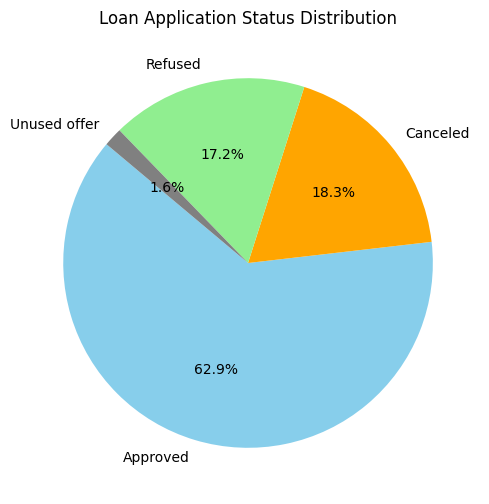

In [108]:
plt.figure(figsize=(8, 6))
status_counts = merged_df['NAME_CONTRACT_STATUS'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'lightgreen','grey'])
plt.title('Loan Application Status Distribution')
plt.show()

#  Income vs Credit Relationship
* 1.Scatter plot to visualize the relationship between total income and credit amount.
* 2.Different colors indicate whether a loan was defaulted (TARGET)

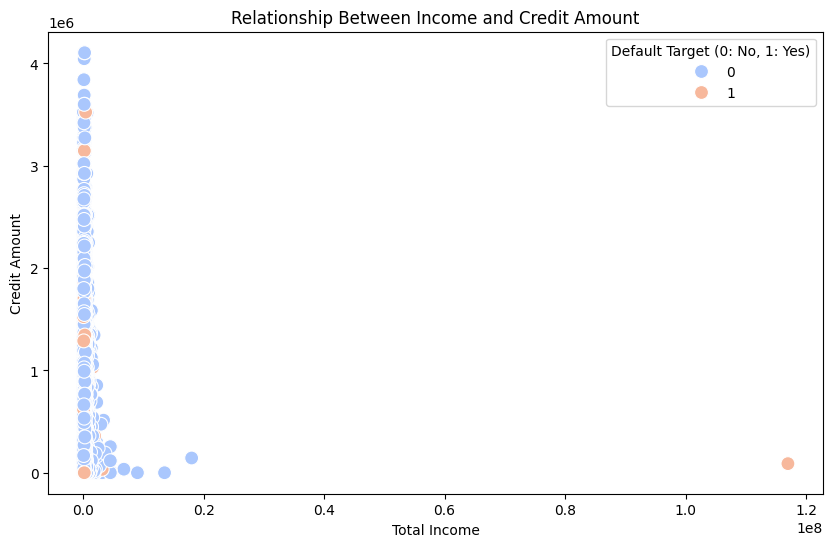

In [109]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='TARGET', palette='coolwarm', data=merged_df, s=100)
plt.title('Relationship Between Income and Credit Amount')
plt.xlabel('Total Income')
plt.ylabel('Credit Amount')
plt.legend(title='Default Target (0: No, 1: Yes)')
plt.show()

# Distribution of Target Variable
* Count of loan defaults (TARGET) helps analyze the default proportion

C:\Users\amitk\AppData\Local\Temp\ipykernel_12012\1294036130.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=merged_df, palette='viridis')


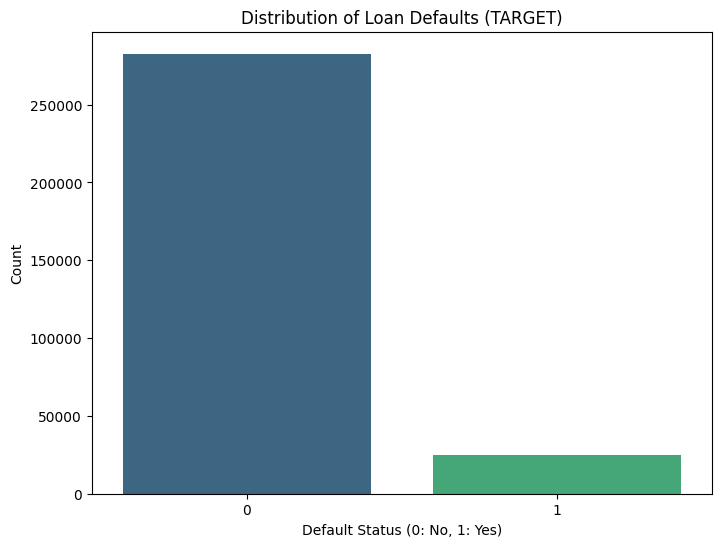

In [110]:
plt.figure(figsize=(8, 6))
sns.countplot(x='TARGET', data=merged_df, palette='viridis')
plt.title('Distribution of Loan Defaults (TARGET)')
plt.xlabel('Default Status (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Family Members vs Credit Applications
* Bar chart highlights how the number of family members impacts credit applications.

C:\Users\amitk\AppData\Local\Temp\ipykernel_12012\3048425376.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CNT_FAM_MEMBERS', y='AMT_CREDIT', data=merged_df, ci=None, palette='muted')
C:\Users\amitk\AppData\Local\Temp\ipykernel_12012\3048425376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CNT_FAM_MEMBERS', y='AMT_CREDIT', data=merged_df, ci=None, palette='muted')


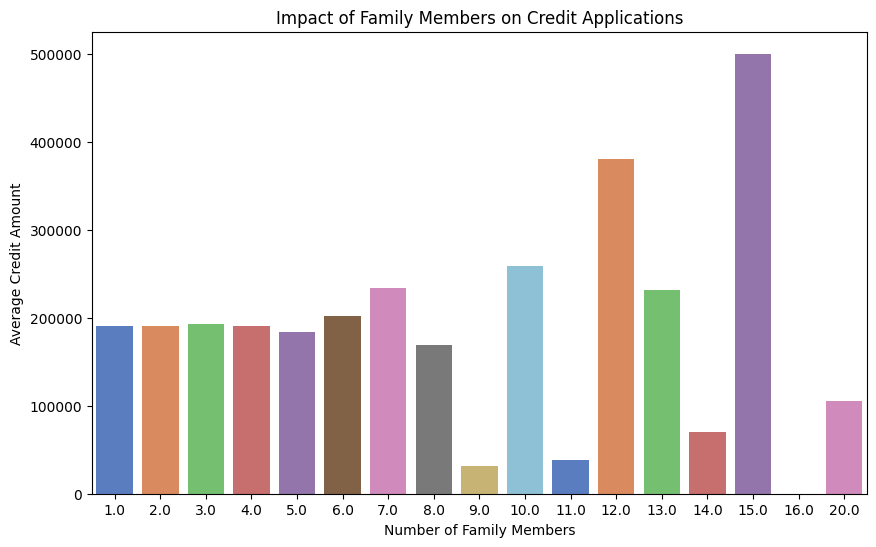

In [111]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CNT_FAM_MEMBERS', y='AMT_CREDIT', data=merged_df, ci=None, palette='muted')
plt.title('Impact of Family Members on Credit Applications')
plt.xlabel('Number of Family Members')
plt.ylabel('Average Credit Amount')
plt.show()

# Loan Applications by Gender

* Count plot compares the number of loan applications by gender.

C:\Users\amitk\AppData\Local\Temp\ipykernel_12012\888162258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CODE_GENDER', data=merged_df, palette='Set2')


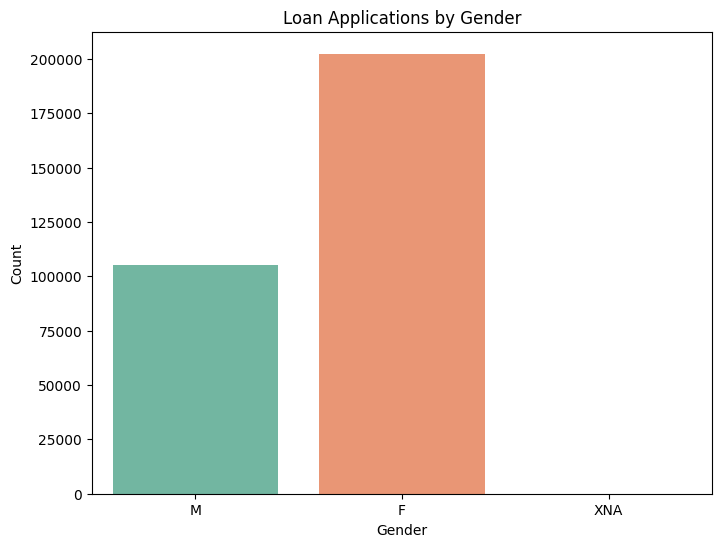

In [112]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CODE_GENDER', data=merged_df, palette='Set2')
plt.title('Loan Applications by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Age Distribution of Applicants

* Histogram showing the age distribution, indicating common age ranges

C:\Users\amitk\AppData\Local\Temp\ipykernel_12012\3832773356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['AGE'] = abs(merged_df['DAYS_BIRTH']) / 365  # Convert to age in years


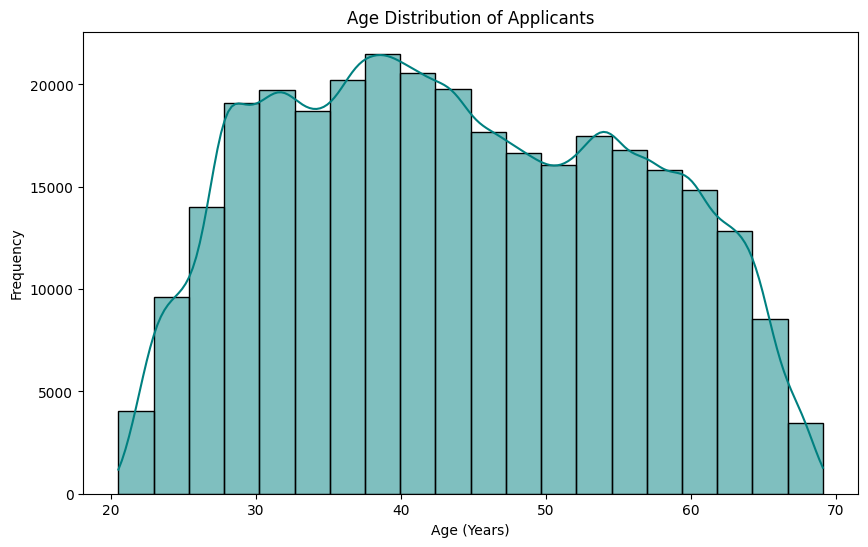

In [113]:
plt.figure(figsize=(10, 6))
merged_df['AGE'] = abs(merged_df['DAYS_BIRTH']) / 365  # Convert to age in years
sns.histplot(merged_df['AGE'], bins=20, kde=True, color='teal')
plt.title('Age Distribution of Applicants')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

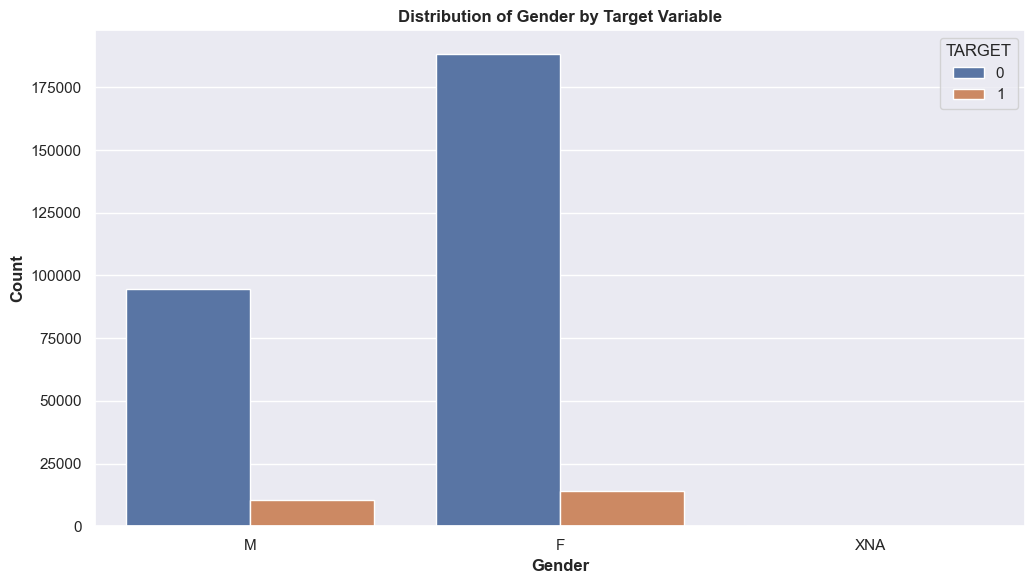

In [131]:
fig = plt.figure(figsize=[20, 6])
plt.subplot(1, 2, 1)
plt.title("Distribution of Gender by Target Variable", weight="bold")
sns.countplot(x="CODE_GENDER", hue="TARGET", data=merged_df, palette="deep")
plt.xlabel("Gender", weight="bold")
plt.ylabel("Count", weight="bold")
plt.tight_layout()
plt.show()


# Education type and Income relationship

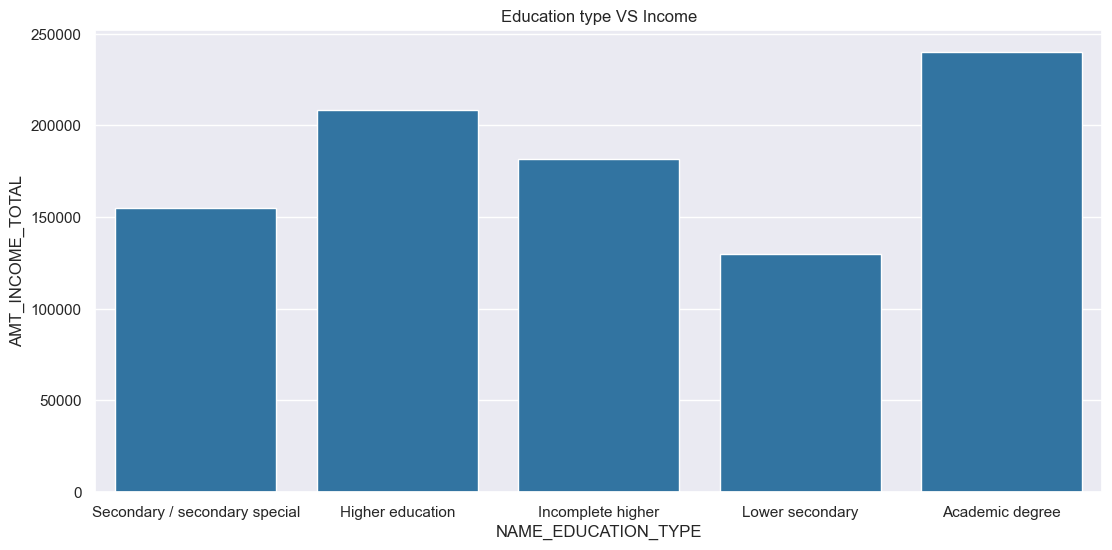

In [126]:
plt.figure(figsize=(13,6))
sns.barplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', data= merged_df,errorbar=None)
plt.title('Education type VS Income')
plt.show()

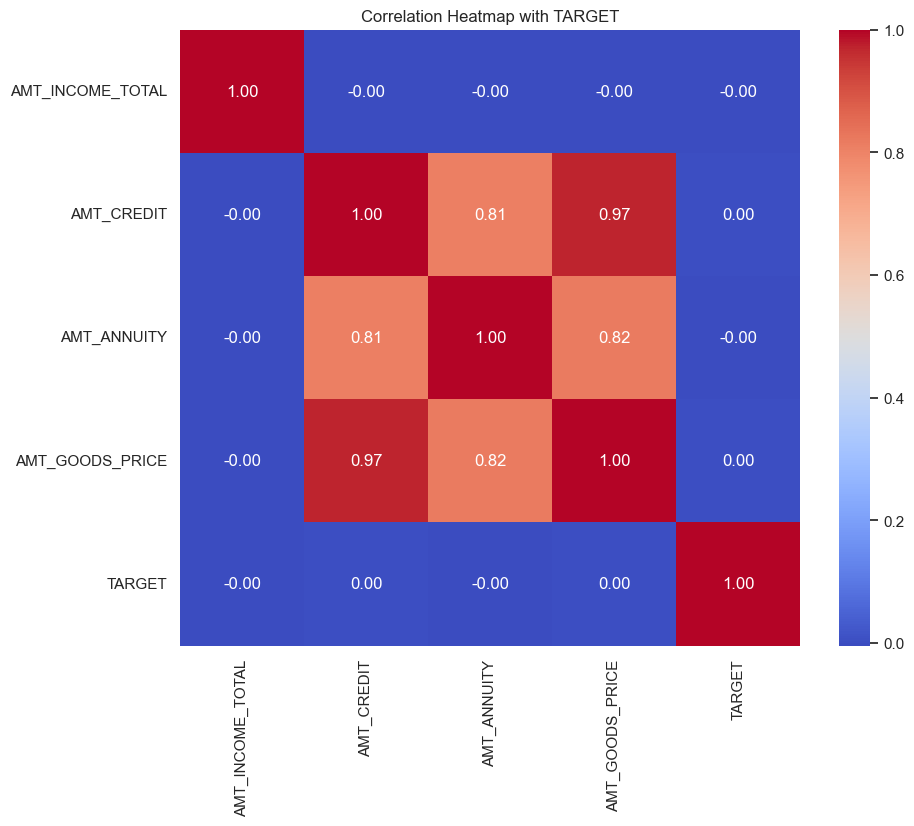

In [127]:
plt.figure(figsize=(10, 8))
corr = merged_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'TARGET']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with TARGET')
plt.show()

# Conclusion

* **Income and Education Level Relationship**: The plot demonstrates a clear positive correlation between education level and income. Individuals with higher education levels tend to have higher incomes compared to those with lower education levels.

* **Income Variation by Education Type**:

* Academic Degree: Individuals with an academic degree  have the highest average income.
* Higher Education: Those with a higher education degree  have the second-highest average income.
* Secondary/Secondary Special: Individuals with a secondary or secondary special education have a moderate average income.
* Incomplete Higher: This group has a slightly lower average income compared to those with higher education or secondary education.
* Lower Secondary: Those with a lower secondary education level have the lowest average income.